In [1]:
#!pip install matplotlib
import uproot
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Open the ROOT file
file = uproot.open("eeTojjlv.root")

#CREATE TREE
tree = file["Delphes"]



In [3]:
tree.keys()

['Event',
 'Event/Event.fUniqueID',
 'Event/Event.fBits',
 'Event/Event.Number',
 'Event/Event.ReadTime',
 'Event/Event.ProcTime',
 'Event/Event.ProcessID',
 'Event/Event.MPI',
 'Event/Event.Weight',
 'Event/Event.CrossSection',
 'Event/Event.CrossSectionError',
 'Event/Event.Scale',
 'Event/Event.AlphaQED',
 'Event/Event.AlphaQCD',
 'Event/Event.ID1',
 'Event/Event.ID2',
 'Event/Event.X1',
 'Event/Event.X2',
 'Event/Event.ScalePDF',
 'Event/Event.PDF1',
 'Event/Event.PDF2',
 'Event_size',
 'Weight',
 'Weight/Weight.fUniqueID',
 'Weight/Weight.fBits',
 'Weight/Weight.Weight',
 'Weight_size',
 'Particle',
 'Particle/Particle.fUniqueID',
 'Particle/Particle.fBits',
 'Particle/Particle.PID',
 'Particle/Particle.Status',
 'Particle/Particle.IsPU',
 'Particle/Particle.M1',
 'Particle/Particle.M2',
 'Particle/Particle.D1',
 'Particle/Particle.D2',
 'Particle/Particle.Charge',
 'Particle/Particle.Mass',
 'Particle/Particle.E',
 'Particle/Particle.Px',
 'Particle/Particle.Py',
 'Particle/Parti

In [4]:
#Create Branches
MET = tree["MissingET"]
FatJET = tree["FatJet"]
JetSize = tree["Jet_size"]
#Electron = tree["Electron"]

#Create Leavs arrays
METleafs = MET.arrays()
FatJetleafs = FatJET.arrays()
#Electronleafs = Electron.arrays()   #incomplete
# Note that jetsize is directly stored inside the tree
JetSizeLeafs = JetSize.arrays()
#MuonEta_values = tree["Muon/Muon.Eta"].arrays()#incomplete
#MuonPT_values = tree["Muon/Muon.PT"].arrays()#incomplete

In [5]:
#MuonPT_List = [ item['Muon.PT'] for item in MuonPT_values]#incomplete

In [6]:
#MuonPT_values#incomplete

In [7]:
#values for FatJetETA postProcessing
FatJetEta_values = FatJetleafs["FatJet.Eta"]
FJETA_List = FatJetEta_values.to_list()
# for empty elements we return a 0 to make it numerical
FJETA_List_converted = [sublist if sublist else [0] for sublist in FJETA_List]     ###### FJETA LIST ########
#FJETA_List_converted[9999]

In [8]:
#values for FatJetPT postProcessing
FatJetPT_values = FatJetleafs["FatJet.PT"]
FJPT_List = FatJetPT_values.to_list()
# for empty elements we return a 0 to make it numerical
FJPT_List_converted = [sublist if sublist else [0] for sublist in FJPT_List]       ###### FJPT LIST ########
#FJPT_List_converted[9999]

In [9]:
met_values = METleafs["MissingET.MET"]
MET_List = met_values.to_list()
#in case of empty elements
MET_List_converted = [sublist if sublist else [0] for sublist in MET_List]         ###### MET LIST ########
#MET_List_converted [9999]

In [10]:
JetSize_List = JetSizeLeafs.to_list()
#in case of empty elements
JetSize_List_converted = [sublist if sublist else [0] for sublist in JetSize_List]         ###### JETSIZE ########
#JetSize_List_converted[9999]

In [11]:
Particleleaf= tree["Particle/Particle.PID"]
PPID_Leaf_array = Particleleaf.arrays()
PPID_List = PPID_Leaf_array.to_list()
PPID_List_converted = [sublist if sublist else [0] for sublist in PPID_List]         ###### Particle_PID ########


In [12]:
## checking for muon
mu_indecis = []
j = 0
for i in PPID_List_converted:
    
    if 13 in i['Particle.PID']:
        #print("13 is present in the list with idex of:",j)
        mu_indecis.append(j)
    #else:
        #print("13 is not present in the list")
    j+=1

len(mu_indecis)
#print(mu_indecis)

1178

In [13]:
# Checking for electron
k = 0
e_indices = []

for i in PPID_List_converted:
    count_var = i['Particle.PID'].count(11)
    if count_var>1:
        e_indices.append(k)
        #print("Event with the following indice has a final electron",k)
    #else:
        #print("Event with the following indice has zero final electron",k)
    k+=1


len(e_indices)
#print(e_indices)



10000

In [14]:
# Calculating the common indices:
set_mu = set(mu_indecis)
set_electron = set(e_indices)
common_elements = set_mu.intersection(set_electron)
leptonic_and_list = list(common_elements)                                       #### NOT NEEDED IN THIS ANALYSIS
# List of processes with both electron and muons in the final state

In [15]:
len(leptonic_and_list)

1178

In [16]:
leptonic_or_set = set(e_indices+mu_indecis)
leptonic_or_list = list(leptonic_or_set)       #### Don't use this for our TASK! we need the hist for corresponding leptons
len(leptonic_or_list)                          ### not all processes with have either of the electron or muons
                                               #   It's just for further analyses.

10000

In [17]:
JetSizeCount_List = [   entry['Jet_size'] for entry in JetSize_List_converted   ]

jetcounter=0
Jet_Indices=[]
for jjcounter in JetSizeCount_List:
    if jjcounter >= 2:
        Jet_Indices.append(jetcounter)
    jetcounter += 1
len(Jet_Indices)
#Jet_Indices               ### Indices for Jets >=2         ESSENTIAL
set_jet = set(Jet_Indices)
print(len(set_jet))

7998


In [18]:
FlatMET_List = [number for sublist in MET_List_converted for number in sublist]  

metcounter = 0
met_Indices = []                              ## USE met_Indecies for calculations
for met in FlatMET_List:
    if met >0:
        met_Indices.append(metcounter)
    metcounter +=1

set_MET = set(met_Indices)
len(set_MET)

## since all of the processes has missing energy MET. we will not go through these indices.

10000

In [19]:
# Checking if Jet >= 2 , MET > 0 and having a muon PID(13) > 0

In [20]:
Compared_Mu_Jet_MET_List = list(set_jet.intersection(set_mu,set_MET))
len(Compared_Mu_Jet_MET_List)


897

In [21]:
# Checking if Jet >= 2 , MET > 0 and having a electron PID(11) > 1 (since the initial state has one electron inside)

Compared_Electron_Jet_MET_List = list(set_jet.intersection(set_electron, set_MET))
len(Compared_Electron_Jet_MET_List)

7998

In [22]:
FJPT_Hist_data = []
for index in Compared_Mu_Jet_MET_List:
    FJPT_Hist_data.append(FJPT_List_converted[index])

In [23]:
FJEta_Hist_data = []
for index in Compared_Mu_Jet_MET_List:
    FJEta_Hist_data.append(FJETA_List_converted[index])

In [24]:
Electron = tree["Electron"]
Electronleafs =Electron.arrays()
Electron_List = Electronleafs.to_list()
#electronPT_values = Electron_List("Electron.PT")
electronPT_values = Electronleafs["Electron.PT"].to_list()
electronEta_values = Electronleafs["Electron.Eta"].to_list()

#Converting the empty elements to zero elements
electronPT_List_converted = [ sublist if sublist else [0] for sublist in  electronPT_values ]
electronEta_List_converted = [ sublist if sublist else [0] for sublist in  electronEta_values ]


In [25]:
Muon = tree["Muon"]


MuonPTleafs = Muon["Muon.PT"]
MuonPT_List = MuonPTleafs.arrays()
MuonPT_List_unpadded = MuonPT_List['Muon.PT'].to_list()

MuonEtaleafs = Muon["Muon.Eta"]
MuonEta_List = MuonEtaleafs.arrays()
MuonEta_List_unpadded = MuonEta_List['Muon.Eta'].to_list()

In [26]:
MuonPT_converted = [ sublist if sublist else [0] for sublist in   MuonPT_List_unpadded       ]
MuonEta_converted = [sublist if sublist else [0] for sublist in MuonEta_List_unpadded  ]

In [27]:
# Prepare Data for hist

In [28]:
MuPT_Hist_data = []                                     ### USE THIS HIST
for index in Compared_Mu_Jet_MET_List:
    MuPT_Hist_data.append(MuonPT_converted[index])

In [29]:
MuEta_Hist_data = []                                     ### USE THIS HIST
for index in Compared_Mu_Jet_MET_List:
    MuEta_Hist_data.append(MuonEta_converted[index])

In [30]:
ePT_Hist_data = []                                     ### USE THIS HIST
for index in Compared_Mu_Jet_MET_List:
    ePT_Hist_data.append(electronPT_List_converted[index])

In [31]:
eEta_Hist_data = []                                     ### USE THIS HIST
for index in Compared_Mu_Jet_MET_List:
    eEta_Hist_data.append(electronEta_List_converted[index])

In [32]:
# We also calculated before:

In [33]:
#FJPT_Hist_data = []                                    ### USE THIS HIST
#for index in Compared_Mu_Jet_MET_List:
#    FJPT_Hist_data.append(FJPT_List_converted[index])

In [34]:
#FJEta_Hist_data = []                                     ### USE THIS HIST
#for index in Compared_Mu_Jet_MET_List:
#    FJPT_Hist_data.append(FJETA_List_converted[index])

In [35]:
############################################################ ############################################################

In [36]:
############################################################ CREATING HISTOGRAMS ############################################################

In [37]:
########################################################################################################################

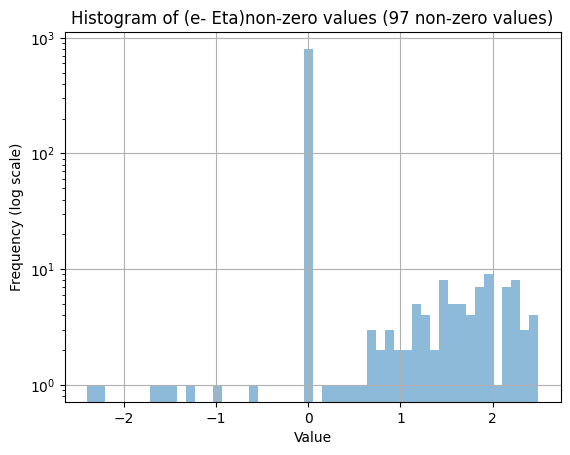

In [38]:
eEtaPlot = [item for sublist in eEta_Hist_data for item in sublist]

# Count the occurrences of non-zero values
non_zero_count_eEta = np.count_nonzero(eEtaPlot)

# Plot histogram
plt.hist(eEtaPlot, bins=50, alpha=0.5)
plt.yscale('log')  # Logarithmic scale on y-axis
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram of (e- Eta)non-zero values ({} non-zero values)'.format(non_zero_count_eEta))
plt.grid(True)
plt.savefig('eEtaPlot.png', dpi=600) 
plt.show()


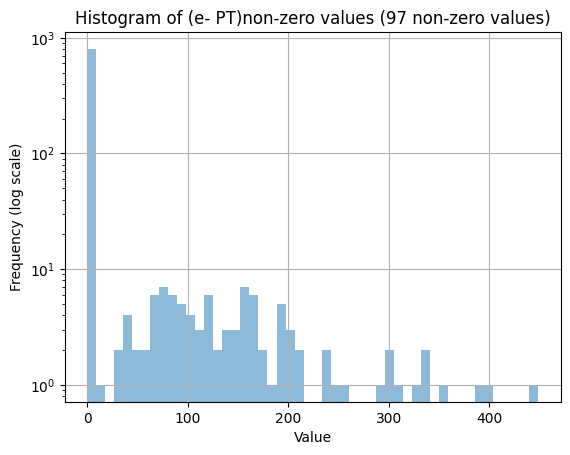

In [39]:
ePTPlot = [item for sublist in ePT_Hist_data for item in sublist]

# Count the occurrences of non-zero values
non_zero_count_ePT = np.count_nonzero(ePTPlot)

# Plot histogram
plt.hist(ePTPlot, bins=50, alpha=0.5)
plt.yscale('log')  # Logarithmic scale on y-axis
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram of (e- PT)non-zero values ({} non-zero values)'.format(non_zero_count_ePT))
plt.grid(True)
plt.savefig('ePTPlot.png', dpi=600) 
plt.show()


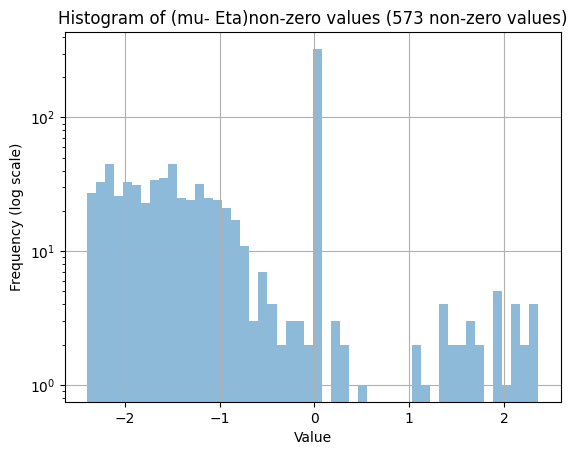

In [40]:
muEtaPlot = [item for sublist in MuEta_Hist_data for item in sublist]

# Count the occurrences of non-zero values
non_zero_count_muEta = np.count_nonzero(muEtaPlot)

# Plot histogram
plt.hist(muEtaPlot, bins=50, alpha=0.5)
plt.yscale('log')  # Logarithmic scale on y-axis
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram of (mu- Eta)non-zero values ({} non-zero values)'.format(non_zero_count_muEta))
plt.grid(True)
plt.savefig('muEtaPlot.png', dpi=600) 
plt.show()


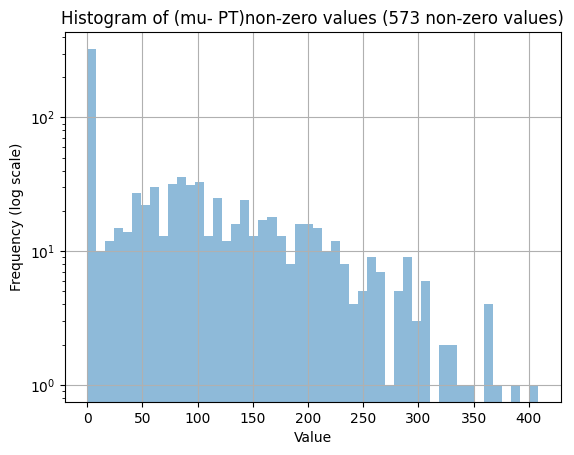

In [41]:
muPTPlot = [item for sublist in MuPT_Hist_data for item in sublist]

# Count the occurrences of non-zero values
non_zero_count_muEta = np.count_nonzero(muPTPlot)

# Plot histogram
plt.hist(muPTPlot, bins=50, alpha=0.5)
plt.yscale('log')  # Logarithmic scale on y-axis
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram of (mu- PT)non-zero values ({} non-zero values)'.format(non_zero_count_muEta))
plt.grid(True)
plt.savefig('muPTPlot.png', dpi=600) 
plt.show()


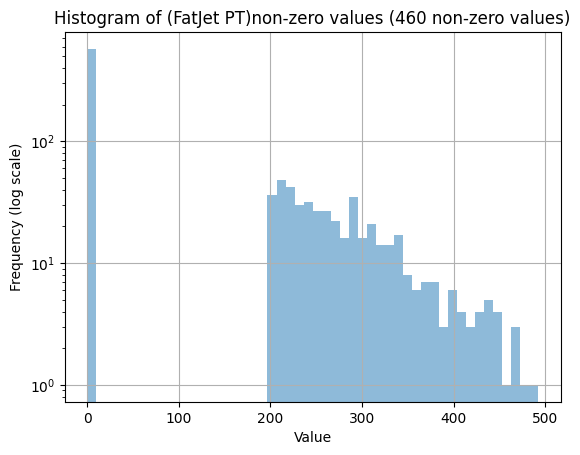

In [42]:
FJPTPlot = [item for sublist in FJPT_Hist_data for item in sublist]

# Count the occurrences of non-zero values
non_zero_count_FJPT = np.count_nonzero(FJPTPlot)

# Plot histogram
plt.hist(FJPTPlot, bins=50, alpha=0.5)
plt.yscale('log')  # Logarithmic scale on y-axis
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram of (FatJet PT)non-zero values ({} non-zero values)'.format(non_zero_count_FJPT))
plt.grid(True)
plt.savefig('FJPTPlot.png', dpi=600) 
plt.show()


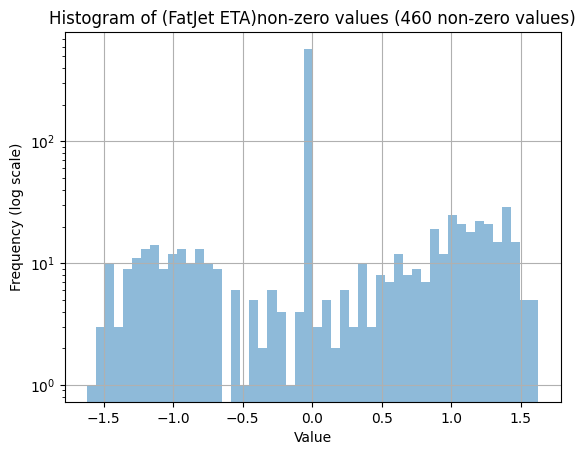

In [43]:
FJETAPlot = [item for sublist in FJEta_Hist_data for item in sublist]

# Count the occurrences of non-zero values
non_zero_count_FJETA = np.count_nonzero(FJETAPlot)

# Plot histogram
plt.hist(FJETAPlot, bins=50, alpha=0.5)
plt.yscale('log')  # Logarithmic scale on y-axis
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.title('Histogram of (FatJet ETA)non-zero values ({} non-zero values)'.format(non_zero_count_FJETA))
plt.grid(True)
plt.savefig('FJETAPlot.png', dpi=600) 
plt.show()
